# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm

# 2. Data Loading & Splitting

In [2]:
# Load dataset
df = pd.read_csv('iq_level.csv')
df.head()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,54,Iraq,88,193.0,3757.0,32.3
1,105,Gambia,55,14.0,648.0,32.9
2,104,Equatorial Guinea,56,NaN,7625.0,29.9
3,44,Ukraine,91,143.0,2375.0,14.6
4,40,Portugal,93,1005.0,19253.0,21.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


In [5]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 108
Number of columns: 6


In [6]:
# Split the dataset into training and testing sets
df_test = df.iloc[:R//5 + 1, :]
df_test.head()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,54,Iraq,88,193.0,3757.0,32.3
1,105,Gambia,55,14.0,648.0,32.9
2,104,Equatorial Guinea,56,NaN,7625.0,29.9
3,44,Ukraine,91,143.0,2375.0,14.6
4,40,Portugal,93,1005.0,19253.0,21.5


In [7]:
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 22
Number of columns: 6


In [8]:
df_train = df.iloc[R//5 + 1:, :]
df_train.head()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
22,102,Ghana,61,76.0,1166.0,32.1
23,43,Greece,91,781.0,21101.0,22.3
24,69,Albania,82,118.0,3513.0,21.4
25,101,Congo,64,7.0,316.0,30.4
26,29,United States,97,2608.0,49883.0,18.8


In [9]:
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 86
Number of columns: 6


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [10]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 86
Number of columns: 6


In [11]:
# Drop unnecessary columns
df_train = df_train.drop(['country'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train = df_train.drop(['rank'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.columns

Index(['IQ', 'education_expenditure', 'avg_income', 'avg_temp'], dtype='object')

In [12]:
# headers = ["Transaction date", "House age", "Distance to the nearest MRT station",
#            "Number of convenience stores", "Latitude", "Longitude", "House price of unit area"]
# df_train.columns = headers
# df_train.columns

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IQ                     86 non-null     int64  
 1   education_expenditure  84 non-null     float64
 2   avg_income             85 non-null     float64
 3   avg_temp               86 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.8 KB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IQ                     84 non-null     int64  
 1   education_expenditure  84 non-null     float64
 2   avg_income             84 non-null     float64
 3   avg_temp               84 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.8 KB


In [16]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [17]:
# Show non-numeric columns
# print("Non-numeric columns:")
# print(sorted(list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))))

In [18]:
# Encode categorical columns
# categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

# for col in categorical_cols:
#     mapping = dict()
#     values = sorted(df_train[col].unique())

#     for i in range(len(values)):
#         mapping[values[i]] = i

#     enc_map =[{'col': col, 'mapping': mapping}]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)

# X = df_train.drop(['Sales'], axis=1)
# y = df_train['Sales']
# X = pd.get_dummies(X)
# df_train = pd.concat([X, y], axis=1)
# df_train

In [19]:
# Separate features and labels
y = df_train['IQ']
X = df_train.drop(['IQ'], axis=1)

<Axes: >

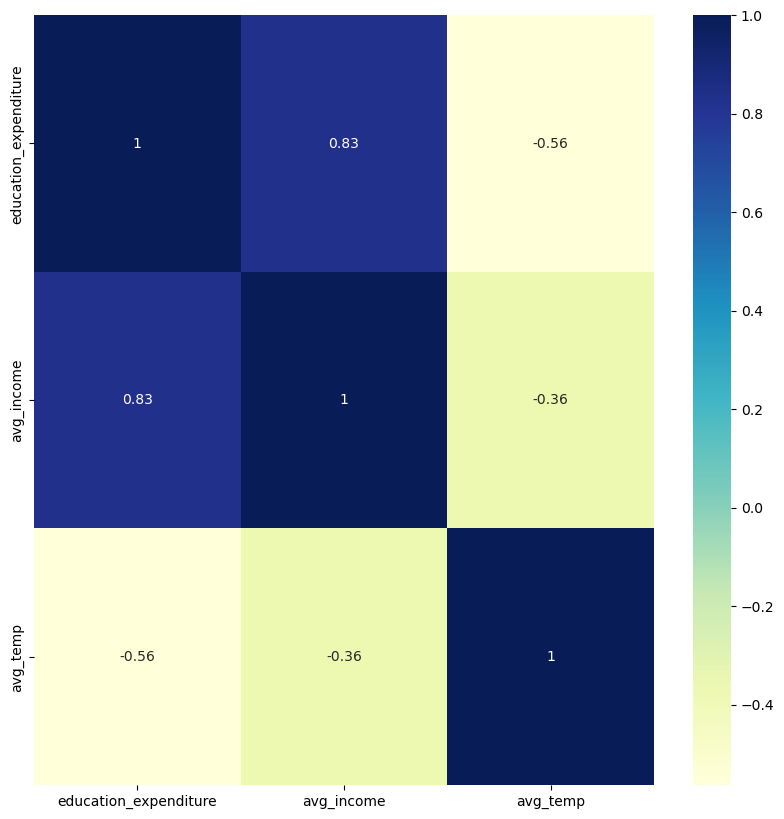

In [20]:
# Displaying heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

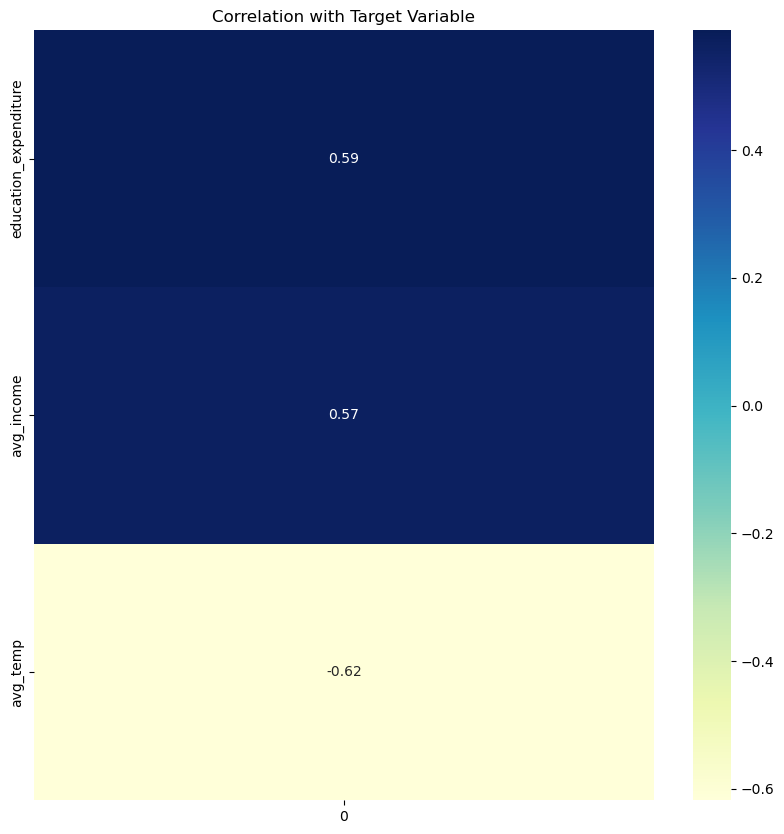

In [21]:
# Create a correlation matrix with target variable
corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

In [22]:
# Check for outliers in numerical columns before polynomial features
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)

In [23]:
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

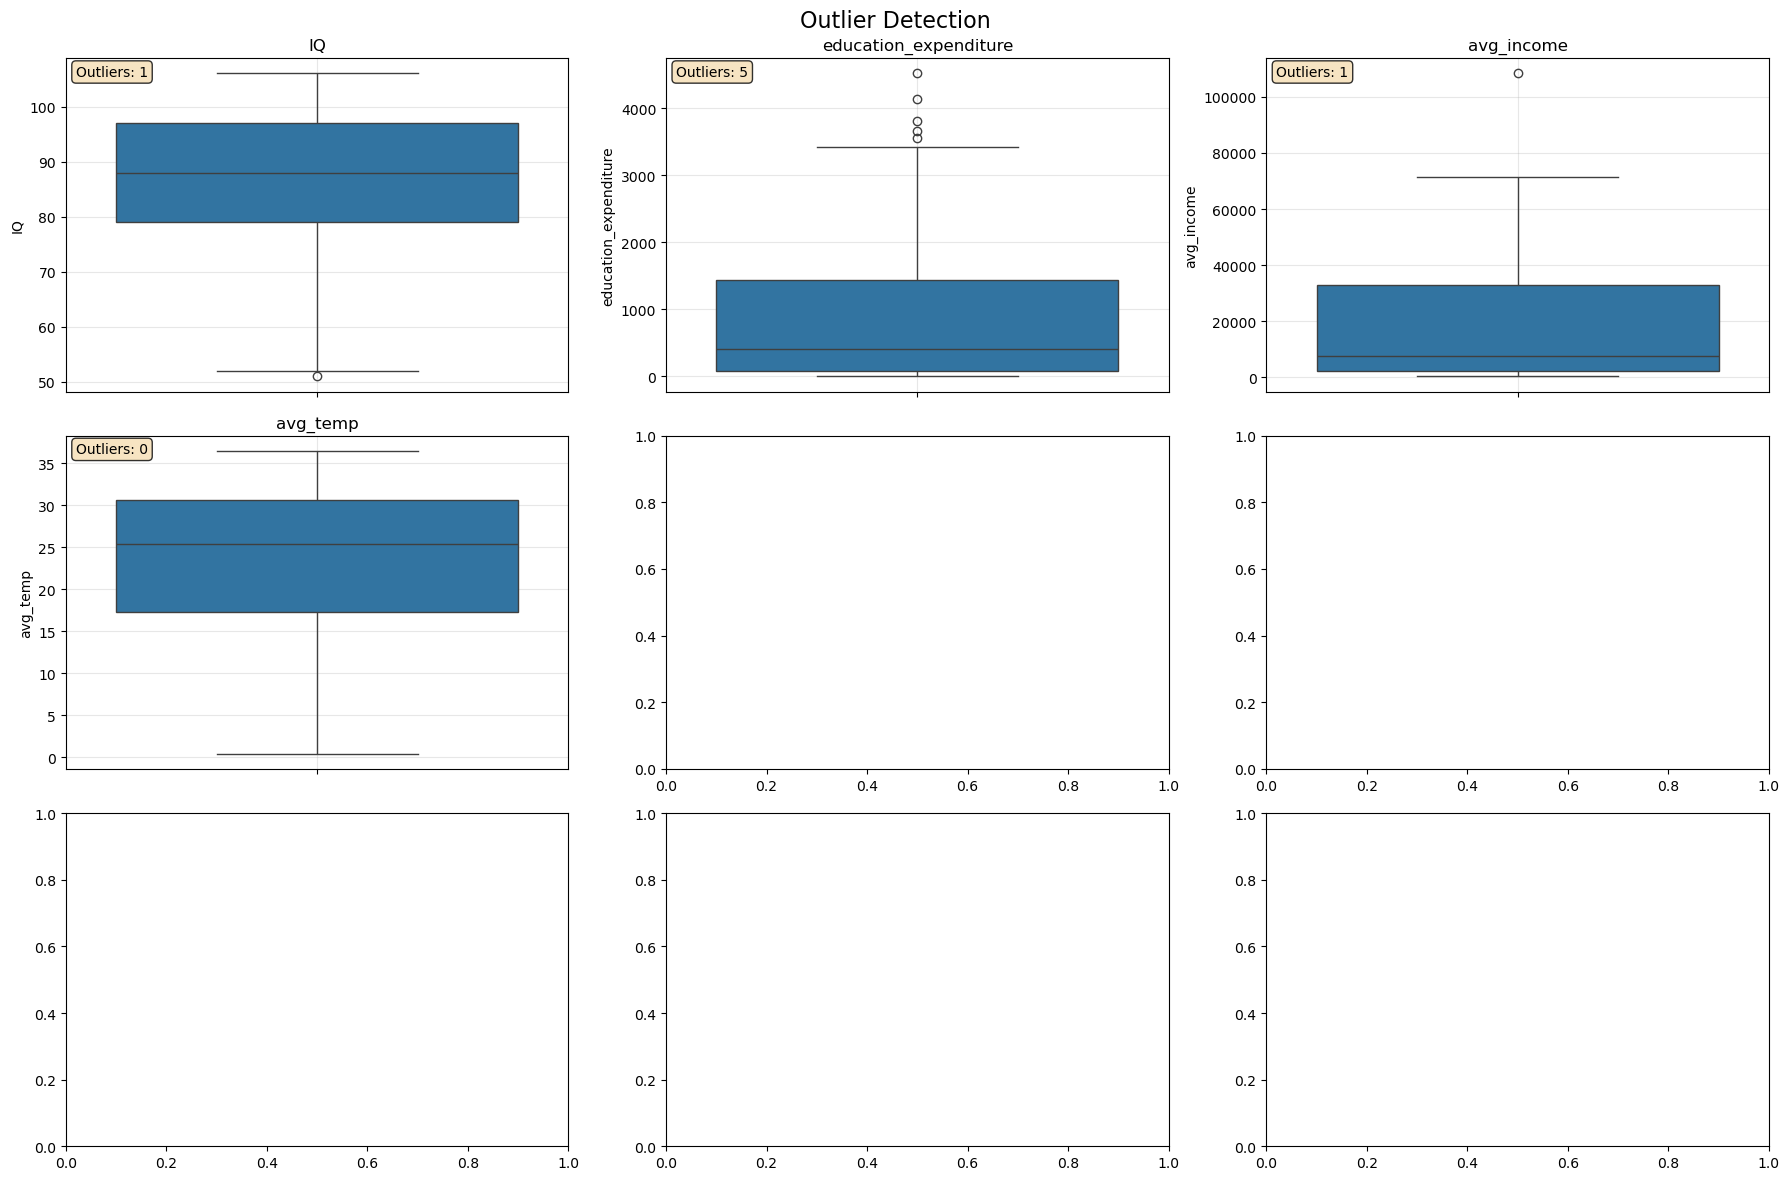

In [24]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [25]:
# # Remove outliers based on IQR method
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

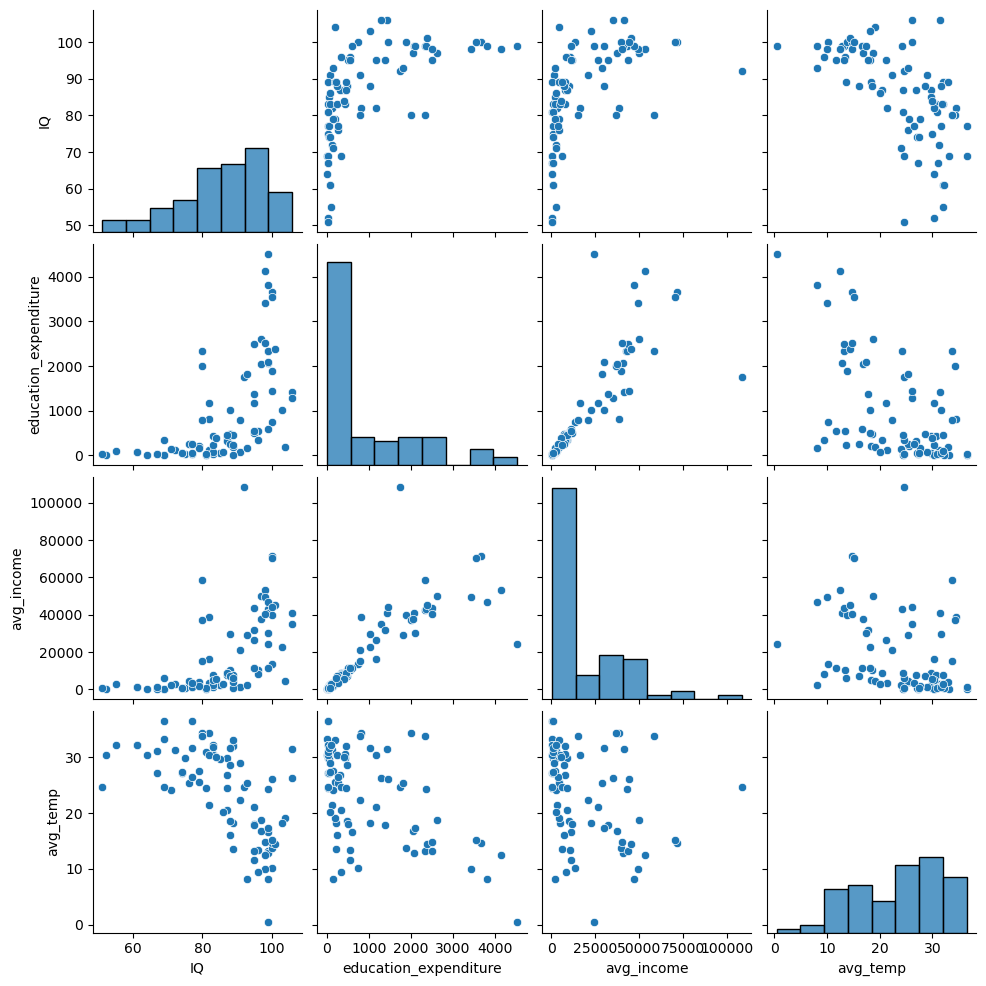

In [26]:
sns.pairplot(df_train)

In [27]:
df_train.describe()

,IQ,education_expenditure,avg_income,avg_temp
count,84.000000,84.000000,84.000000,84.000000
mean,86.000000,917.166667,18044.928571,23.686905
std,12.759121,1129.054054,21311.347564,8.196073
min,51.000000,1.000000,316.000000,0.400000
25%,79.000000,82.000000,2307.750000,17.250000
50%,88.000000,411.000000,7738.500000,25.350000
75%,97.000000,1433.000000,32904.000000,30.675000
max,106.000000,4518.000000,108349.000000,36.500000


In [28]:
# Separate features and labels
y_train = df_train['IQ']
X_train = df_train.drop(['IQ'], axis=1)

In [29]:
X_train = np.log(X_train)

In [30]:
# MinMax Scaling
numeric_cols = X_train.select_dtypes(include='number').columns

scaler_X = MinMaxScaler(feature_range=(2, 3))
scaler_Y = MinMaxScaler(feature_range=(2, 3))

X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_train, columns=['IQ'])

,IQ
0,2.181818
1,2.727273
2,2.563636
3,2.236364
4,2.836364
...,...
79,2.672727
80,2.072727
81,2.418182
82,2.890909


### 3.2 Testing Data

In [31]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 22
Number of columns: 6


In [32]:
# Drop unnecessary columns
df_test = df_test.drop(['country'], axis=1)
df_test = df_test.reset_index(drop=True)
df_test = df_test.drop(['rank'], axis=1)
df_test = df_test.reset_index(drop=True)
df_test.columns

Index(['IQ', 'education_expenditure', 'avg_income', 'avg_temp'], dtype='object')

In [33]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [34]:
# Check for missing values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IQ                     22 non-null     int64  
 1   education_expenditure  19 non-null     float64
 2   avg_income             21 non-null     float64
 3   avg_temp               22 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 836.0 bytes


In [35]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   IQ                     19 non-null     int64  
 1   education_expenditure  19 non-null     float64
 2   avg_income             19 non-null     float64
 3   avg_temp               19 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 740.0 bytes


In [36]:
# Separate features and labels
y_test = df_test['IQ']
X_test = df_test.drop(['IQ'], axis=1)

In [37]:
X_test = np.log(X_test)

In [38]:
# MinMax Scaling
numeric_cols = X_test.select_dtypes(include='number').columns

X_test[numeric_cols] = scaler_X.transform(X_test[numeric_cols])
y_test = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_test, columns=['IQ'])

,IQ
0,2.672727
1,2.072727
2,2.727273
3,2.763636
4,2.436364
5,2.545455
6,3.000000
7,2.818182
8,2.563636
9,2.909091


# 4. Logarithmic Regression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Evaluate the model

residual_df = None

def evaluate_model(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    y_pred = scaler_Y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_Y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

print("Logarithmic Regression")
evaluate_model(model, X_test, y_test)

Logarithmic Regression
MAE: 5.747675023183231
MSE: 69.25303316097674
RMSE: 8.3218407315315
R^2: 0.5195013459328733


In [41]:
residual_df

,Y_Test,Y_Pred,Residuals
0,88.0,79.559288,8.440712
1,55.0,71.969231,-16.969231
2,91.0,81.232728,9.767272
3,93.0,91.005518,1.994482
4,75.0,70.918946,4.081054


# 5. Tuning